# Simulation with Biogemma founders

Made by: Sarah Odell
github: https://github.com/sarahodell

Summary: Using the method for simulating MAGIC lines from [ValidateFILLINPipeline](ValidateFILLINPipeline.ipynb), I will created simulated MAGIC DH lines using the 600K genotype data from the 16 founders.

Table of Contents:
1. <a href=#section1>Simulating MAGIC lines</a>
2. <a href=#section2>Building Genotype Files</a>
3. <a href=#section3>Assess FILLIN Projection Alignment</a>

In [1]:
import  time
import  platform
%pylab inline
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
print('Created using Python', platform.python_version())

Populating the interactive namespace from numpy and matplotlib
Last updated: 02/07/2018
('Created using Python', '2.7.13')


<a id=section1></a>
### 1. Simulating MAGIC lines

In [2]:
import full_sim

In [3]:
#list of founders
founders=["A632_usa", "B73_inra", "CO255_inra", "FV252_inra", "OH43_inra", "A654_inra", "FV2_inra", "C103_inra", "EP1_inra", "D105_inra", "W117_inra", "B96", "DK63", "F492", "ND245","VA85"]
len(founders)

16

In [9]:
pop = full_sim.chrom_sim(founders,16)
lines = [full_sim.make_magic(pop) for i in range(10)] 

In [10]:
lines[0]

['VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'VA85',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 'DK63',
 

In [13]:
full_sim.make_outfile(lines,'sim_files/062018/Biogemma_MAGICSim.txt')

<a id=section2></a>
### 2. Building Genotype Files

In [2]:
import re

In [16]:
txt = ('\n').join(founders)
with open('data_files/biogemma_founders.txt','w') as outfile:
    outfile.write(txt)

In [23]:
axiom = {}
with open('../biogemma/Axiom600KSNPs.txt','r') as infile:
    count=1
    for line in infile:
        if re.search('^#', line)==None and re.search('^ID',line)==None:
            rs = line.split()[3]
            ax = line.split()[0]
            axiom[rs]=[count,3]
            axiom[ax]=[count,0]
        count+=1

In [29]:
print(axiom['PHM1506.18'])

[18, 3]


In [135]:
biogemma = {}
with open('../data_files/founder_genos.txt','r') as infile:
    count=1
    for line in infile:
        if re.search('^BGA_ID', line)==None:
            rs = line.split()[0]
            biogemma[rs]=count
        else:
            header=('\t').join(line.split('\t')[1:])
        count+=1

In [136]:
header

'A632_usa\tA654_inra\tB73_inra\tB96\tC103_inra\tCO255_inra\tD105_inra\tDK63\tEP1_inra\tF492\tFV2_inra\tFV252_inra\tND245\tOH43_inra\tVA85\tW117_inra\n'

In [115]:
index_list=[]
for b in biogemma:
    if b in axiom:
        index_list.append([biogemma[b],axiom[b]])

In [116]:
index_list[0]

[341974, [419180, 0]]

In [121]:
q = '{0}p'.format(419180)
t = !sed -n "$q" '../biogemma/Axiom600KSNPs.txt'
rs=!echo t | cut -d ' ' -f1
str(t).split('\\t')[0:4]

["['AX-90928720", 'AX-90928720', 'Affx-90175313', 'ZmSYNBREED_45891_115']

In [123]:
q = '{0}p'.format(341974)
t = !sed -n "$q" '../data_files/founder_genos.txt'
rs=!echo t | cut -d ' ' -f1
str(t).split('\\t')[0]

"['AX-90928720"

In [124]:
from subprocess import Popen,PIPE

In [133]:
b_process = Popen(['sed','-n','341974p','../data_files/founder_genos.txt'],stdout=PIPE,stderr=PIPE)
stdout,stderr=b_process.communicate()

In [134]:
bline =stdout.split('\t')
('\t').join(bline[1:])

'G\tA\tA\tA\tG\tA\tG\tG\tA\tA\tA\tA\tA\tA\tA\tG\n'

In [117]:
txt='rs#\talleles\tchrom\tpos\tstrand\tassembly#\tcenter\tprotLSID\tassayLSID\tpanelLSID\tQCcode\t'
head=!head -n1 '../founder_genos.txt' | cut -f2-
txt+=head[0]+'\n'
for i in index_list:
    bnum=i[0]
    anum=i[1][0]
    acol=i[1][1]
    q = '{0}p'.format(bnum)
    p = '{0}p'.format(anum)
    bline = !sed -n "$q" '../data_files/founder_genos.txt'
    aline = !sed -n "$p" '../data_files/Axiom600KSNPs.txt'
    ainfo= str(aline).split('\\t')
    rs=str(bline).split('\\t')[0][2:]
    snps=('\t').join(str(bline).split('\\t')[1:])
    strand=['+' if ainfo[8]=='f' else '-' if ainfo[8]=='r' else '.'][0]
    rest = '.\t.\t.\t.\t.\t.\t'
    txt+='{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\n'.format(rs,ainfo[9],ainfo[5],ainfo[6],strand,rest,snps)
with open('test.hmp.txt','w') as outfile:
    outfile.write(txt)   

^C
^C


IndexError: list index out of range

# 3. Assess FILLIN Projection Alignment Accuracy

In [2]:
from subprocess import Popen, PIPE
import os
import pandas as pd

In [4]:
projaout = 'sim_files/062018/MAGICSim_Biogemma_062018_Imputed.pa.txt'

In [5]:
process = Popen(['awk','/#Donor Haplotypes/{flag=1;next}/#Taxa Breakpoints/{flag=0}flag',projaout],stdout=PIPE,stderr=PIPE)
stdout,sterr=process.communicate()

In [6]:
#The ProjA file uses number codes for the donors
#Make a dictionary of all the donors and their associated keys
donors={}
for i in stdout.split('\n')[:-1]:
    line = i.split('\t')
    donors[line[0]]=line[1]

In [7]:
donors

{'0': 'A632_usa',
 '1': 'B73_inra',
 '10': 'W117_inra',
 '11': 'B96',
 '12': 'DK63',
 '13': 'F492',
 '14': 'ND245',
 '15': 'VA85',
 '2': 'CO255_inra',
 '3': 'FV252_inra',
 '4': 'OH43_inra',
 '5': 'A654_inra',
 '6': 'FV2_inra',
 '7': 'C103_inra',
 '8': 'EP1_inra',
 '9': 'D105_inra'}

In [8]:
#Now parse out the assignment blocks
process = Popen(['awk','/#Block are defined chr:startPos:endPos:donor1:donor2/{flag=1;next}/,0/{flag=0}flag',projaout],stdout=PIPE,stderr=PIPE)
stdout,sterr=process.communicate()

In [26]:
breakpoints = []
for i in stdout.split('\n')[:-1]:
    line = i.split('\t')
    brks = {}
    sample=line[0]
    for j in line[1:-1]:
        info=j.split(':')
        chrom=info[0]
        start=info[1]
        end=info[2]
        donor1=info[3]
        donor2=info[4]
        brks = {'sample':sample, 'chr':chrom, 'start':start, 'end':end, 'donor1': donors[donor1], 'donor2':donors[donor2]}
        breakpoints.append(brks)

In [27]:
#turn the dictionary into a pandas dataframe
df = pd.DataFrame(breakpoints)
proja = df[['sample','chr','start','end','donor1','donor2']]

In [28]:
proja.head()

,sample,chr,start,end,donor1,donor2
0,M6,10,275461,1287330,VA85,VA85
1,M6,10,1288077,1498351,A632_usa,A654_inra
2,M6,10,1498470,1680374,A632_usa,B73_inra
3,M6,10,1680639,2016941,A632_usa,VA85
4,M6,10,2016972,2254417,A632_usa,OH43_inra


In [29]:
proja.to_csv('sim_files/062018/Predicted_BiogemmaMAGIC_062018.txt',sep='\t',index=False)

In [30]:
actual = pd.read_table('sim_files/062018/Biogemma_MAGICSim.txt')
proja = pd.read_table('sim_files/062018/Predicted_BiogemmaMAGIC_062018.txt')

In [31]:
actual.head()

,sample,chr,start,end,donor1,donor2
0,M1,10,0,17999999,VA85,VA85
1,M1,10,18000000,133999999,DK63,DK63
2,M1,10,134000000,144999999,F492,F492
3,M1,10,145000000,146999999,D105_inra,D105_inra
4,M1,10,147000000,150000000,B73_inra,B73_inra


In [90]:
homozygous = proja[proja['donor1']==proja['donor2']]
homozygous['line']=[i[1:] for i in list(homozygous['sample'])]
projaideo=homozygous[['line','start','end','donor1','donor2']]
projaideo.to_csv('Predicted_BiogemmaMAGIC_NoHetero_ideo.txt',sep='\t',index=False)


/Users/sodell1090/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
proja['line']=[i[1:] for i in list(proja['sample'])]
projaideo=proja[['line','start','end','donor1','donor2']]

In [83]:
projaideo.to_csv('Predicted_BiogemmaMAGIC_ideo2.txt',sep='\t',index=False)

In [84]:
actual['line']=[i[1:] for i in list(actual['sample'])]
actualideo=actual[['line','start','end','donor1','donor2']]
actualideo.to_csv('Actual_BiogemmaMAGIC_ideo.txt',sep='\t',index=False)

In [36]:
def make_rgb(parents):
    """Randomly generates rgb colors for each NAM parent for plotting 
    ideograms. Output is a dictionary with parent names as keys and 
    rgb lists as values"""
    color_lookup = {'Cent': (0.0, 0.0, 0.0)}
    for i in parents:
        rgb = numpy.random.random_sample(3)
        rgb = [round(j,2) for j in rgb]
        #rgb=tuple(round(numpy.random.random_sample(3),2))
        color_lookup[i]=rgb
    return color_lookup

In [38]:
color_lookup=make_rgb(founders)
color_lookup

{'A632_usa': [0.96, 0.16, 0.59],
 'A654_inra': [0.95, 0.53, 0.36],
 'B73_inra': [0.52, 0.94, 0.49],
 'B96': [0.28, 0.54, 0.35],
 'C103_inra': [0.69, 0.83, 0.94],
 'CO255_inra': [0.66, 0.74, 0.27],
 'Cent': (0.0, 0.0, 0.0),
 'D105_inra': [0.34, 0.8, 0.35],
 'DK63': [0.28, 0.08, 0.36],
 'EP1_inra': [0.58, 0.45, 0.4],
 'F492': [0.49, 0.13, 0.15],
 'FV252_inra': [0.56, 0.82, 0.84],
 'FV2_inra': [0.16, 0.68, 0.15],
 'ND245': [0.68, 0.08, 0.48],
 'OH43_inra': [0.44, 0.14, 0.29],
 'VA85': [0.69, 0.72, 0.21],
 'W117_inra': [0.4, 0.24, 0.83]}

In [77]:
color_lookup={'A632_usa': [0.96, 0.16, 0.59],
 'A654_inra': [0.95, 0.53, 0.36],
 'B73_inra': [0.52, 0.94, 0.49],
 'B96': [0.28, 0.54, 0.35],
 'C103_inra': [0.69, 0.83, 0.94],
 'CO255_inra': [0.66, 0.74, 0.27],
 'Cent': (0.0, 0.0, 0.0),
 'D105_inra': [0.34, 0.8, 0.35],
 'DK63': [0.28, 0.08, 0.36],
 'EP1_inra': [0.58, 0.45, 0.4],
 'F492': [0.49, 0.13, 0.15],
 'FV252_inra': [0.56, 0.82, 0.84],
 'FV2_inra': [0.16, 0.68, 0.15],
 'ND245': [0.68, 0.08, 0.48],
 'OH43_inra': [0.44, 0.14, 0.29],
 'VA85': [0.69, 0.72, 0.21],
 'W117_inra': [0.4, 0.24, 0.83]}

In [93]:
sample_count=10
"""
Demonstrates plotting chromosome ideograms and genes (or any features, really)
using matplotlib.
1) Assumes a file from UCSC's Table Browser from the "cytoBandIdeo" table,
saved as "ideogram.txt". Lines look like this::
    #chrom  chromStart  chromEnd  name    gieStain
    chr1    0           2300000   p36.33  gneg
    chr1    2300000     5300000   p36.32  gpos25
    chr1    5300000     7100000   p36.31  gneg
2) Assumes another file, "ucsc_genes.txt", which is a BED format file
   downloaded from UCSC's Table Browser. This script will work with any
   BED-format file.
"""
from matplotlib import pyplot as plt
from matplotlib.collections import BrokenBarHCollection


# Here's the function that we'll call for each dataframe (once for chromosome
# ideograms, once for genes).  The rest of this script will be prepping data
# for input to this function
#

def chromosome_collections(df, y_positions, height,  **kwargs):
    """
    Yields BrokenBarHCollection of features that can be added to an Axes
    object.
    Parameters
    ----------
    df : pandas.DataFrame
        Must at least have columns ['chrom', 'start', 'end', 'color']. If no
        column 'width', it will be calculated from start/end.
    y_positions : dict
        Keys are chromosomes, values are y-value at which to anchor the
        BrokenBarHCollection
    height : float
        Height of each BrokenBarHCollection
    Additional kwargs are passed to BrokenBarHCollection
    """
    del_width = False
    if 'width' not in df.columns:
        del_width = True
        df['width'] = df['end'] - df['start']
    for chrom, group in df.groupby('chrom'):
        print chrom
        yrange = (y_positions[chrom], height)
        xranges = group[['start', 'width']].values
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors1'], **kwargs)
        yrange=(y_positions[chrom]-0.4,height)
        yield BrokenBarHCollection(
            xranges, yrange, facecolors=group['colors2'], **kwargs)
            
    if del_width:
        del df['width']
        
# Height of each ideogram
chrom_height = 0.4

# Spacing between consecutive ideograms
chrom_spacing = 1

# Height of the gene track. Should be smaller than `chrom_spacing` in order to
# fit correctly
gene_height = 0.2

# Padding between the top of a gene track and its corresponding ideogram
gene_padding = 0.1

# Width, height (in inches)
figsize = (10, 10)

# Decide which chromosomes to use ***### EDIT HERE for no. of RILS ###***
chromosome_list = [i for i in range(1, sample_count+1)]

# Keep track of the y positions for ideograms and genes for each chromosome,
# and the center of each ideogram (which is where we'll put the ytick labels)
ybase = 0
chrom_ybase = {}
gene_ybase = {}
chrom_centers = {}

for chrom in chromosome_list[::-1]:
    chrom_ybase[chrom] = ybase
    chrom_centers[chrom] = ybase + chrom_height / 2.
    gene_ybase[chrom] = ybase - gene_height - gene_padding
    ybase += chrom_height + chrom_spacing
    
    
# Read in file from output of make_ideogram()
ideo = pd.read_table(
    'Predicted_BiogemmaMAGIC_ideo2.txt',
    skiprows=1,
    names=['chrom', 'start', 'end', 'donor1','donor2']
)

# Filter out chromosomes not in our list
ideo = ideo[ideo.chrom.apply(lambda x: x in chromosome_list)]
ideo['end'] = pd.to_numeric(ideo['end'])
ideo['start']=pd.to_numeric(ideo['start'])
# Add a new column for width
ideo['width'] = ideo.end - ideo.start

In [33]:
def make_legend(parents):
    legend = []
    for p in parents:
        pcolor=color_lookup[p]
        legend+=[Line2D([0],[0],color=pcolor,lw=4,label=p)]
    legend+=[Line2D([0],[0],color=(0.0,0.0,0.0),lw=4,label='Cent')]
    return legend

In [31]:
ideo.head()

,chrom,start,end,donor,width,colors
0,6,275461,1287330,VA85,1011869,"[0.69, 0.72, 0.21]"
1,6,4688530,4904755,VA85,216225,"[0.69, 0.72, 0.21]"
2,6,5878329,6354859,VA85,476530,"[0.69, 0.72, 0.21]"
3,6,6355136,6597537,OH43_inra,242401,"[0.44, 0.14, 0.29]"
4,6,15037960,16507327,A632_usa,1469367,"[0.96, 0.16, 0.59]"


1
2
3
4
5
6
7
8
9
10


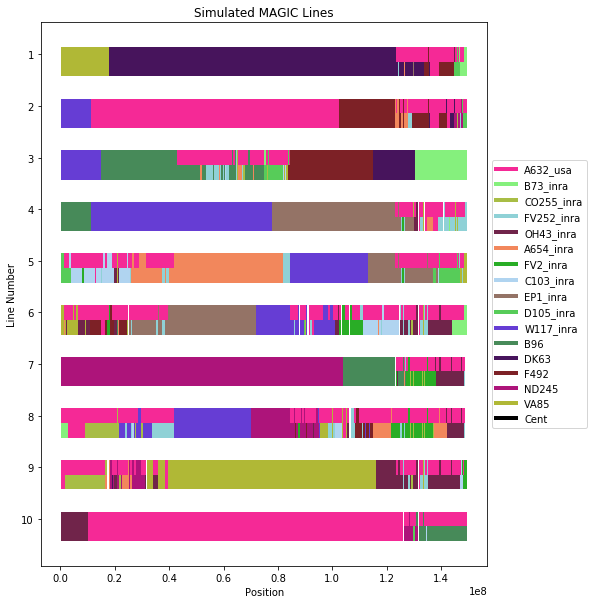

In [94]:
# Add a new column for colors
ideo['colors1'] = ideo['donor1'].apply(lambda x: color_lookup[x])
ideo['colors2']=ideo['donor2'].apply(lambda x: color_lookup[x])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Now all we have to do is call our function for the ideogram data...
#print("adding ideograms...")
for collection in chromosome_collections(ideo, chrom_ybase, chrom_height):
    ax.add_collection(collection)

# Axes tweaking
ax.set_yticks([chrom_centers[i] for i in chromosome_list])
ax.set_yticklabels(chromosome_list)
ax.axis('tight')
ax.set_xlabel('Position')
ax.set_ylabel('Line Number')
ax.set_title('Simulated MAGIC Lines')
#legend(ideo['colors'],loc='lower right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis

legend_elements = make_legend(founders)

#[Line2D([0], [0], color=(0.4, 0.4, 0.4), lw=4,label='B73'),
#Line2D([0], [0], color=(0.58, 0.96, 0.87), lw=4,label='Oh43')]
ax.legend(handles=legend_elements,loc='center left',bbox_to_anchor=(1,0.5))

plt.show()

In [35]:
%run pscripts/intersect.py 'sim_files/062018/Biogemma_MAGICSim.txt' 'sim_files/062018/Predicted_BiogemmaMAGIC_062018.txt'

None
None
None
None
None
Parent W117_inra not shared between actual and predicted in sample M1 chr 10

Parent A632_usa not shared between actual and predicted in sample M1 chr 10

Parent ND245 not shared between actual and predicted in sample M1 chr 10

Parent B96 not shared between actual and predicted in sample M1 chr 10

Parent EP1_inra not shared between actual and predicted in sample M1 chr 10

Parent OH43_inra not shared between actual and predicted in sample M1 chr 10

Parent A654_inra not shared between actual and predicted in sample M1 chr 10

Parent FV252_inra not shared between actual and predicted in sample M1 chr 10

Parent C103_inra not shared between actual and predicted in sample M1 chr 10

Parent FV2_inra not shared between actual and predicted in sample M1 chr 10

Parent CO255_inra not shared between actual and predicted in sample M1 chr 10

Parent VA85 not shared between actual and predicted in sample M2 chr 10

None
None
None
Parent B73_inra not shared between actua

In [36]:
!cat 'intersect_output.txt'

Line	Total % Correct	Chrom	% per Parent
M1	0.85	10	VA85:1.0	DK63:0.997	F492:0.988	D105_inra:0.837	B73_inra:0.917	W117_inra:0	A632_usa:0	ND245:0	B96:0	EP1_inra:0	OH43_inra:0	A654_inra:0	FV252_inra:0	C103_inra:0	FV2_inra:0	CO255_inra:0
M2	0.825	10	VA85:0	DK63:0.699	F492:0.995	D105_inra:0.912	B73_inra:0	W117_inra:0.995	A632_usa:0.8	ND245:0.954	B96:0	EP1_inra:0	OH43_inra:0	A654_inra:0	FV252_inra:0	C103_inra:0	FV2_inra:0	CO255_inra:0
M3	0.723	10	VA85:0.835	DK63:0.966	F492:0.988	D105_inra:0.916	B73_inra:0.973	W117_inra:0.999	A632_usa:0	ND245:0	B96:1.0	EP1_inra:0	OH43_inra:0	A654_inra:0	FV252_inra:0	C103_inra:0	FV2_inra:0	CO255_inra:0
M4	0.848	10	VA85:0	DK63:0	F492:0	D105_inra:0	B73_inra:0	W117_inra:1.0	A632_usa:0.087	ND245:0	B96:0.995	EP1_inra:0.998	OH43_inra:1.0	A654_inra:0.919	FV252_inra:0.818	C103_inra:0	FV2_inra:0	CO255_inra:0
M5	0.68	10	VA85:0.847	DK63:0	F492:0	D105_inra:0.997	B73_inra:0	W117_inra:0.987	A632_usa:0	ND245:0	B96:0	EP1_inra:0.977	OH43_inra:0	A654_inra:1.0	FV252_inra:0.386	C

In [37]:
!rm -r tmp

In [80]:
actual[actual['sample']=='M1']

,sample,chr,start,end,donor1,donor2,line
0,M1,10,0,17999999,VA85,VA85,1
1,M1,10,18000000,133999999,DK63,DK63,1
2,M1,10,134000000,144999999,F492,F492,1
3,M1,10,145000000,146999999,D105_inra,D105_inra,1
4,M1,10,147000000,150000000,B73_inra,B73_inra,1


In [98]:
hetero=proja[proja['donor1']!=proja['donor2']]
sum((hetero['donor1']=='A632_usa') | (hetero['donor2']=='A632_usa'))

358

In [99]:
len(hetero)

385